Daniel Oviedo

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/hand_wash_sequences.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1881,1882,1883,1884,1885,1886,1887,1888,1889,label
0,0.584919,0.829982,4.781172e-07,0.553225,0.778041,-0.017855,0.531645,0.676997,-0.024759,0.514374,...,0.486820,0.581084,-0.047497,0.478382,0.516566,-0.050029,0.472420,0.460250,-0.052602,Step_1
1,0.567425,0.886066,4.752740e-07,0.528438,0.806773,0.012431,0.497533,0.704834,0.013112,0.481755,...,0.515869,0.442902,-0.007166,0.512868,0.397804,-0.003342,0.511042,0.358148,-0.000834,Step_1
2,0.578725,0.697042,5.801903e-07,0.565549,0.625170,-0.035581,0.550652,0.532503,-0.041898,0.528205,...,0.464817,0.659512,-0.051566,0.455332,0.596738,-0.055770,0.446951,0.539835,-0.058975,Step_1
3,0.546822,0.918597,4.891096e-07,0.516551,0.849736,-0.012024,0.496420,0.752799,-0.020775,0.484681,...,0.547722,0.477326,-0.061101,0.538961,0.426731,-0.065870,0.530918,0.379316,-0.069498,Step_1
4,0.580899,0.712401,4.222959e-07,0.535720,0.662130,-0.004654,0.517298,0.587271,-0.011242,0.508761,...,0.508730,0.470374,-0.041636,0.499769,0.420801,-0.042485,0.493425,0.376730,-0.042353,Step_1


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Separar características (landmarks) y etiqueta (paso)
landmarks = df.drop(columns=['label'])
labels = df['label']

# Normalización usando MinMaxScaler para ajustar entre 0 y 1
scaler = MinMaxScaler()
landmarks_normalized = scaler.fit_transform(landmarks)

# Aplicar PCA para reducir la dimensionalidad
# Selecciona el número de componentes principales que desees mantener
pca = PCA(n_components=0.95)  # Conserva el 95% de la varianza
landmarks_smoothed = pca.fit_transform(landmarks_normalized)

# Convertir el resultado de PCA a un DataFrame
df_smoothed = pd.DataFrame(landmarks_smoothed)
df_smoothed['label'] = labels.values  # Añadir la columna de etiquetas

# Mostrar el DataFrame resultante con las características suavizadas
print(df_smoothed.head())


          0         1         2         3         4         5         6  \
0  0.599400 -1.575253  1.647694  1.771341  0.711651 -0.172949 -0.661369   
1 -1.219909 -1.640987  1.790266  1.645459  0.616613 -0.734947  0.558639   
2 -0.611166 -1.777437  0.988885  1.216800  0.744529  0.464704 -0.575079   
3  0.328025 -1.555322  0.701158  0.953062  0.519426 -0.125628  0.124618   
4 -0.793867 -2.017429  1.188904  0.942472  0.543785  0.024967 -0.147746   

          7         8         9  ...       133       134       135       136  \
0  0.263449 -0.232279 -0.842363  ... -0.030716 -0.040925 -0.017272  0.095639   
1  0.014083 -0.085284 -0.210902  ...  0.048145 -0.099411 -0.272736 -0.098249   
2 -0.120442  0.301041 -0.149894  ...  0.060008  0.018583 -0.142496  0.124398   
3 -0.075831 -0.636453  0.340549  ...  0.226815 -0.198852 -0.181146 -0.026898   
4 -0.022303 -0.269854 -0.525286  ...  0.010203 -0.112724 -0.026731 -0.056407   

        137       138       139       140       141   label  
0 -0.0

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np

# Cargar y procesar el DataFrame
landmarks = df.drop(columns=['label'])
labels = df['label']

# Normalización usando MinMaxScaler
scaler = MinMaxScaler()
landmarks_normalized = scaler.fit_transform(landmarks)

# Aplicar PCA para reducir la dimensionalidad (conserva el 95% de la varianza)
pca = PCA(n_components=0.95)
landmarks_smoothed = pca.fit_transform(landmarks_normalized)

# Convertir el resultado de PCA a un DataFrame y añadir etiquetas
df_smoothed = pd.DataFrame(landmarks_smoothed)
df_smoothed['label'] = labels.values

# Dividir el conjunto de datos en entrenamiento y prueba
X = df_smoothed.drop(columns=['label'])
y = df_smoothed['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos a comparar
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Diccionario para almacenar los resultados
results = {
    "Model": [],
    "Accuracy": [],
    "F1 Score": []
}

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluar métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Guardar resultados
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["F1 Score"].append(f1)

    # Imprimir la matriz de confusión
    print(f"\nMatriz de confusión para {model_name}:")
    print(confusion_matrix(y_test, y_pred))

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results)
print("\nComparación de modelos:")
print(results_df)

# Matriz de correlación y covarianza de las características suavizadas
correlation_matrix = X.corr()
covariance_matrix = X.cov()

print("\nMatriz de correlación:")
print(correlation_matrix)

print("\nMatriz de covarianza:")
print(covariance_matrix)



Matriz de confusión para Random Forest:
[[85  1  0  5  1  1  0  0  1  1  0  0]
 [ 0 60  6  0  0  0  0  0  0  0  0  0]
 [ 0  5 51  1  0  0  0  0  0  1  0  0]
 [26  0  3 37  0  0  0  0  0  2  0  1]
 [ 0  0  0  0 58  0  0  0  0  0  0  0]
 [ 0  1  0  1  0 50  0  3  0  1  0  0]
 [ 0  0  0  0  0  0 53  0  0  0  0  0]
 [ 0  0  0  0  0  2  3 46  0  1  0  1]
 [ 5  0  0  1  2  0  1  0 48  0  0  0]
 [ 1  1  0  2  0  1  2  6  1 35  1  0]
 [ 0  0  0  0  1  0  1  2  1  1 32  2]
 [ 0  0  0  0  1  3  7  0  0  1  5 32]]

Matriz de confusión para SVM:
[[84  0  0  9  1  0  0  0  0  0  1  0]
 [ 0 60  6  0  0  0  0  0  0  0  0  0]
 [ 0  4 50  4  0  0  0  0  0  0  0  0]
 [23  1  0 45  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 58  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 55  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0  0  1]
 [ 0  0  0  0  0  1  0 50  0  0  2  0]
 [ 1  0  0  2  0  0  0  0 53  0  0  1]
 [ 0  0  0  0  0  0  1  4  1 42  1  1]
 [ 0  0  0  0  0  0  0  0  0  0 31  9]
 [ 0  0  0  0  1  0  3  0  0  

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Cargar el DataFrame
df = pd.read_csv('/content/hand_wash_sequences.csv')

# Separar características (landmarks) y etiqueta (paso)
X = df.drop(columns=['label'])
y = df['label']

# Normalización usando MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Aplicar LDA para reducir la dimensionalidad
# Nota: El número de componentes de LDA debe ser menor o igual a (n_classes - 1)
lda = LDA(n_components=None)  # Usa el máximo de componentes posibles (n_clases - 1)
X_lda = lda.fit_transform(X_normalized, y)

# Convertir el resultado de LDA a un DataFrame y añadir etiquetas
df_lda = pd.DataFrame(X_lda)
df_lda['label'] = y.values

# Mostrar el DataFrame resultante con las características suavizadas
print(df_lda.head())


          0         1         2         3         4         5         6  \
0 -7.484361  4.666466 -4.810533  4.883118 -1.364039 -0.645994  0.181022   
1 -5.464172  3.608426 -5.952330  3.612906  1.631014 -0.509712  0.216020   
2 -4.715768  3.882410 -6.121038  2.621638  1.307281  0.264649 -1.834302   
3 -4.387509  4.227930 -5.313075  3.894443  0.135665 -0.104042 -1.430079   
4 -6.040092  4.662827 -6.128620  4.605577  0.215114 -1.772952 -1.069695   

          7         8         9        10   label  
0  2.477426 -0.116221  1.434306  2.071383  Step_1  
1  3.240646 -0.923243  0.451382  3.446403  Step_1  
2  3.497094 -1.229460  0.597221  3.128135  Step_1  
3  2.411316 -0.571975  0.114095  3.171021  Step_1  
4  2.174810 -0.620139  0.928870  4.176140  Step_1  


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np

# Cargar y procesar el DataFrame
df = pd.read_csv('/content/hand_wash_sequences.csv')
X = df.drop(columns=['label'])
y = df['label']

# Normalización usando MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Aplicar LDA para reducir la dimensionalidad
lda = LDA(n_components=None)
X_lda = lda.fit_transform(X_normalized, y)

# Convertir el resultado de LDA a un DataFrame y añadir etiquetas
df_lda = pd.DataFrame(X_lda)
df_lda['label'] = y.values

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_lda.drop(columns=['label']), df_lda['label'], test_size=0.2, random_state=42)

# Codificar etiquetas para modelos de regresión como Lasso
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Definir los modelos
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Ridge Classifier": RidgeClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Extra Trees": RandomForestClassifier(n_estimators=100, random_state=42),
    "Lasso": Lasso(alpha=0.1, random_state=42)
}

# Diccionario para almacenar los resultados
results = {
    "Model": [],
    "Accuracy": [],
    "F1 Score": []
}

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    # Si el modelo es Lasso, usa etiquetas numéricas
    if model_name == "Lasso":
        model.fit(X_train, y_train_encoded)
        y_pred = model.predict(X_test)

        # Redondear las predicciones para convertirlas en etiquetas discretas
        y_pred = np.round(y_pred).astype(int)
        y_pred = np.clip(y_pred, 0, len(le.classes_) - 1)  # Asegura que las predicciones estén en el rango de clases
        y_pred_labels = le.inverse_transform(y_pred)
    else:
        model.fit(X_train, y_train)
        y_pred_labels = model.predict(X_test)

    # Evaluar métricas usando las etiquetas originales
    accuracy = accuracy_score(y_test, y_pred_labels)
    f1 = f1_score(y_test, y_pred_labels, average='weighted')

    # Guardar resultados
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["F1 Score"].append(f1)

    # Imprimir la matriz de confusión para cada modelo
    print(f"\nMatriz de confusión para {model_name}:")
    print(confusion_matrix(y_test, y_pred_labels))

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results)
print("\nComparación de modelos:")
print(results_df)

# Matriz de correlación y covarianza de las características transformadas por LDA
correlation_matrix = X_train.corr()
covariance_matrix = X_train.cov()

print("\nMatriz de correlación:")
print(correlation_matrix)

print("\nMatriz de covarianza:")
print(covariance_matrix)



Matriz de confusión para Random Forest:
[[93  0  0  2  0  0  0  0  0  0  0  0]
 [ 0 66  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 58  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 69  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 58  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 56  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0  0  0]
 [ 0  0  0  1  0  0  0  0 56  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 50  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 49]]

Matriz de confusión para Gradient Boosting:
[[92  0  0  3  0  0  0  0  0  0  0  0]
 [ 0 66  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 57  1  0  0  0  0  0  0  0  0]
 [ 0  0  0 69  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 58  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 56  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  1  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0  0  0]
 [ 0  0  0  2  0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 50  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Matriz de confusión para AdaBoost:
[[95  0  0  0  0  0  0  0  0  0  0  0]
 [65  0  1  0  0  0  0  0  0  0  0  0]
 [57  0  1  0  0  0  0  0  0  0  0  0]
 [69  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 58  0  0  0  0  0  0  0]
 [ 0  0  0  0 56  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 33 19  0  0  0  0]
 [ 1  0  5  0  0  8  7 32  0  0  0  0]
 [57  0  0  0  0  0  0  0  0  0  0  0]
 [50  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0  0 49  0  0  0  0  0  0  0]]

Matriz de confusión para SVM:
[[94  0  0  1  0  0  0  0  0  0  0  0]
 [ 0 66  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 58  0  0  0  0  0  0  0  0  0]
 [ 1  0  0 68  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 58  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 56  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0  0  0]
 [ 1  0  0  0  0  0  0  0 56  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 50  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Cargar el DataFrame
df = pd.read_csv('/content/hand_wash_sequences.csv')

# Separar características (landmarks) y etiqueta (paso)
X = df.drop(columns=['label'])
y = df['label']

# Normalización usando MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Aplicar LDA para reducir la dimensionalidad
lda = LDA(n_components=None)
X_lda = lda.fit_transform(X_normalized, y)

# Convertir el resultado de LDA a un DataFrame y añadir etiquetas
df_lda = pd.DataFrame(X_lda)
df_lda['label'] = y.values

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_lda.drop(columns=['label']), df_lda['label'], test_size=0.2, random_state=42)

# Entrenar el modelo Ridge Classifier
ridge_model = RidgeClassifier(random_state=42)
ridge_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = ridge_model.predict(X_test)

# Crear un DataFrame con las predicciones y etiquetas reales
results_df = X_test.copy()
results_df['Real Label'] = y_test.values
results_df['Predicted Label'] = y_pred

# Evaluar el modelo y agregar las métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Mostrar el DataFrame resultante
print("\nDataFrame con predicciones y etiquetas reales:")
print(results_df.head())


Accuracy: 0.99
F1 Score: 0.99

Matriz de Confusión:
[[93  0  0  2  0  0  0  0  0  0  0  0]
 [ 0 66  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 57  0  0  0  0  0  0  0  0  0]
 [ 3  0  0 66  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 58  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 56  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0  0  0]
 [ 1  0  0  1  0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 50  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 49]]

DataFrame con predicciones y etiquetas reales:
             0         1         2         3         4         5         6  \
2457  2.704911 -7.165955 -0.264788  1.588415 -2.309438 -2.762682  1.481378   
70   -6.294400  4.463963 -4.246290  3.746610 -0.064906 -0.425710 -1.089802   
358  -9.406551 -2.143904  7.912148 -1.012868 -1.144427  2.320004  0.987427   
325  -4.811321  3.152380 -5.109945  2.705486 -0.008300  0.369013 -0.758450   
2208  2.624118 -7.783752 -1.749400  0.216

In [ ]:
ridge_model

RidgeClassifier(random_state=42)

In [ ]:
# prompt: exporta el ridge_model como un .pickle

import pickle

# Save the model to a file
filename = 'ridge_model.pickle'
pickle.dump(ridge_model, open(filename, 'wb'))

In [ ]:
from sklearn.metrics import f1_score, r2_score
from sklearn.preprocessing import LabelEncoder

# Codificar etiquetas para convertirlas a valores numéricos
le = LabelEncoder()
real_labels_encoded = le.fit_transform(results_df['Real Label'])
predicted_labels_encoded = le.transform(results_df['Predicted Label'])

# Calcular F1 Score
f1 = f1_score(real_labels_encoded, predicted_labels_encoded, average='weighted')

# Calcular R^2 Score usando las etiquetas codificadas numéricamente
r2 = r2_score(real_labels_encoded, predicted_labels_encoded)

# Crear un DataFrame con los resultados
evaluation_results = pd.DataFrame({
    "Metric": ["F1 Score", "R^2 Score"],
    "Value": [f1, r2]
})

print("Evaluación usando el DataFrame de predicciones results_df:")
print(evaluation_results)


Evaluación usando el DataFrame de predicciones results_df:
      Metric     Value
0   F1 Score  0.988655
1  R^2 Score  0.984336


In [ ]:
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd

# Número de "folds" para dividir results_df
n_folds = 5
fold_size = len(results_df) // n_folds

# Simular validación cruzada en results_df
f1_scores = []

for fold in range(n_folds):
    # Crear particiones manualmente
    start = fold * fold_size
    end = start + fold_size if fold < n_folds - 1 else len(results_df)
    fold_df = results_df.iloc[start:end]

    # Calcular F1 score para este "fold"
    f1 = f1_score(fold_df['Real Label'], fold_df['Predicted Label'], average='weighted')
    f1_scores.append(f1)
    print(f"F1 Score for fold {fold + 1}: {f1:.2f}")

# Calcular el F1 score promedio
f1_mean = np.mean(f1_scores)
print(f"\nF1 Score promedio: {f1_mean:.2f}")

# Crear un DataFrame para ver los resultados de cada "fold"
cross_val_results_df = pd.DataFrame({
    "Fold": range(1, n_folds + 1),
    "F1 Score": f1_scores
})
print("\nDataFrame con los resultados de la simulación de validación cruzada:")
print(cross_val_results_df)


F1 Score for fold 1: 0.99
F1 Score for fold 2: 0.99
F1 Score for fold 3: 0.99
F1 Score for fold 4: 0.99
F1 Score for fold 5: 0.99

F1 Score promedio: 0.99

DataFrame con los resultados de la simulación de validación cruzada:
   Fold  F1 Score
0     1  0.985840
1     2  0.992727
2     3  0.985390
3     4  0.992847
4     5  0.986040


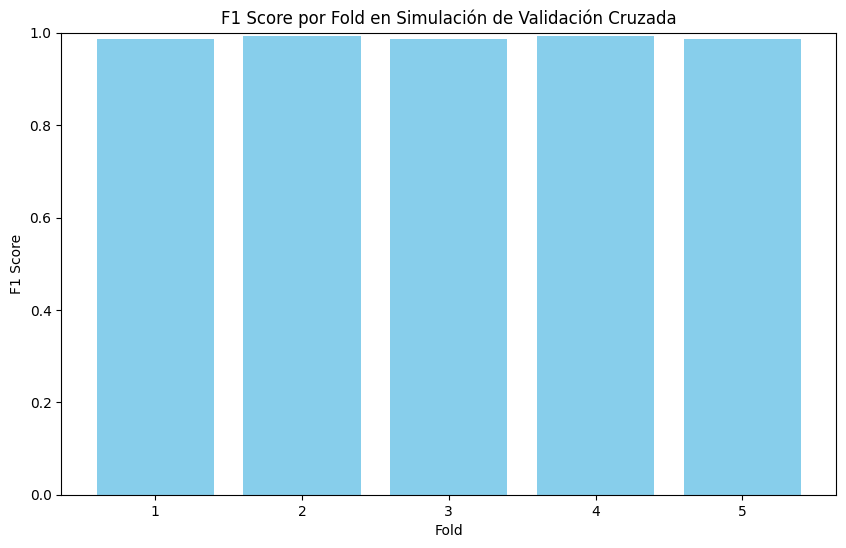

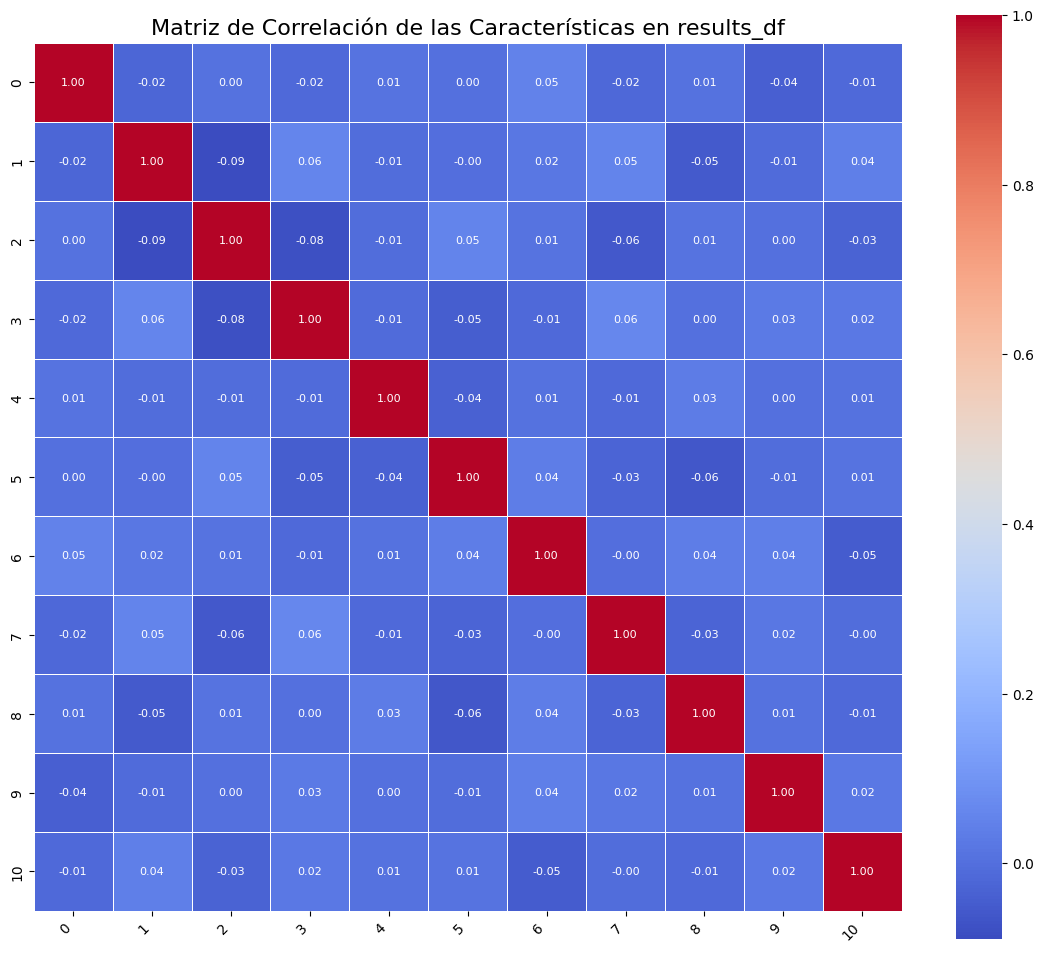

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar F1 Score para cada fold
plt.figure(figsize=(10, 6))
plt.bar(cross_val_results_df["Fold"], cross_val_results_df["F1 Score"], color='skyblue')
plt.xlabel("Fold")
plt.ylabel("F1 Score")
plt.title("F1 Score por Fold en Simulación de Validación Cruzada")
plt.ylim(0, 1)  # Para que el eje y esté entre 0 y 1
plt.show()

# Calcular y mostrar la matriz de correlación para las características en results_df
correlation_matrix = results_df.drop(columns=['Real Label', 'Predicted Label']).corr()

# Mejorar la visualización de la matriz de correlación
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,
            linewidths=.5, annot_kws={"size": 8})
plt.title("Matriz de Correlación de las Características en results_df", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [ ]:
results_df.head()

,0,1,2,3,4,5,6,7,8,9,10,Real Label,Predicted Label
2457,2.704911,-7.165955,-0.264788,1.588415,-2.309438,-2.762682,1.481378,0.198930,-2.943838,1.473030,-0.804887,Step_5_Right,Step_5_Right
70,-6.294400,4.463963,-4.246290,3.746610,-0.064906,-0.425710,-1.089802,2.003510,-1.969343,0.451226,1.590142,Step_1,Step_1
358,-9.406551,-2.143904,7.912148,-1.012868,-1.144427,2.320004,0.987427,-0.737214,-1.226254,2.904555,-0.948090,Step_2_Left,Step_2_Left
325,-4.811321,3.152380,-5.109945,2.705486,-0.008300,0.369013,-0.758450,-0.022370,-0.061655,0.734357,-0.185071,Step_1,Step_1
2208,2.624118,-7.783752,-1.749400,0.216483,-4.339815,-3.831118,2.852951,1.183709,-4.480454,-0.568312,0.417937,Step_5_Right,Step_5_Right


In [ ]:
results_df.to_csv('datasetFinal.csv', index=False)